# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [34]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from physics_sim import PhysicsSim_Params
from task import Task

# Modify the values below to give the quadcopter a different starting position.
file_output = 'data.txt'                         # file name for saved results

runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
simParams = PhysicsSim_Params(init_pose, init_velocities, init_angle_velocities, runtime)

# Setup
task = Task(simParams)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        print(rotor_speeds)
        break
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[447.8353186277008, 447.46696844748834, 446.65079411508344, 448.38993314221085]


In [ ]:
## output from 'rotor_speeds' of basic_agent
#[447.8353186277008, 447.46696844748834, 446.65079411508344, 448.38993314221085]

## And the output from 'action' of a DDPG agent acting
#[0.076394044901377522, 899.79818301603098, 0.19664128817202431, 899.94131351184649]

## Therefore, they are both specifying rotor speeds... I hope.
## Looks pretty bad that 2 of the rotors are basically off.

In [39]:
#%load_ext autoreload
#%autoreload 2

# Modify the values below to give the quadcopter a different starting position.
file_output = 'data.txt'                         # file name for saved results

# Reuse agent previous defined from a training run.
#agent = Basic_Agent(task)
done = False
results = {x : [] for x in labels}
state = agent.reset_episode() # start a new episode

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act(state) 
        next_state, reward, done = task.step(rotor_speeds)
        agent.step(action, reward, next_state, done)

        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

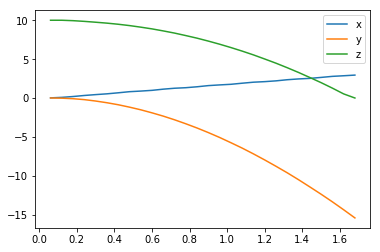

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

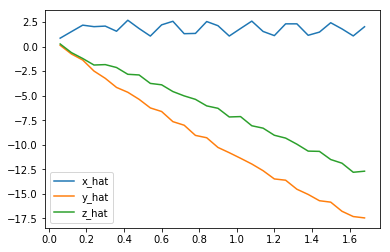

In [41]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

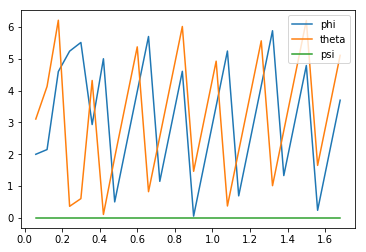

In [42]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

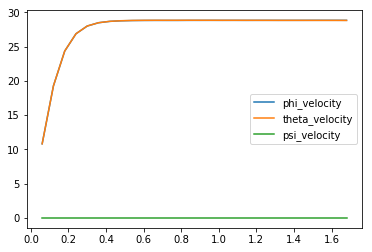

In [43]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

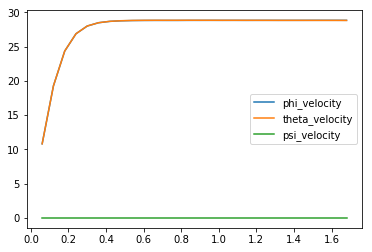

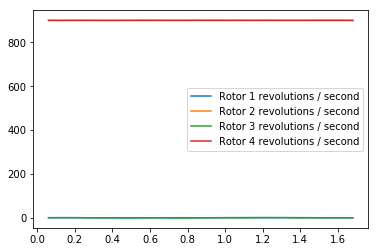

In [52]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [45]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  2.94925421 -15.43826559   0.           3.70083823   5.11073222   0.        ]
[  2.01965055 -17.45592782 -12.69586106]
[ 28.8402385   28.82518679   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## A Basic Sample Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [62]:
%%time

import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from physics_sim import PhysicsSim_Params
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])

task = Task(simParams, target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()


Episode = 1000, score =   0.804 (best =   2.603), noise_scale = 3.25All done!
CPU times: user 34.2 s, sys: 1.96 s, total: 36.1 s
Wall time: 37.1 s


Agents and their perforance as above:
* PolicySearch_Agent(task) 

 ** Episode = 1000, score =  -0.599 (best =  -0.074), noise_scale = 3.2555


 

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [95]:
%%time

# Reload modules to be sure to pick up changes to imports
%reload_ext autoreload

import sys
import pandas as pd
from agents.ddpg_agent import DDPG
from physics_sim import PhysicsSim_Params
from task import Task

num_episodes = 200
hover_target = [0., 0., 18] # Picking a hover point much closer to the initial pose, so that penalty is smaller
                #42.]  # Hover to the optimal height of the Universe.
# np.array([10., 10., 20.]) # let's try moving later

task = Task(simParams, target_pos = hover_target)
agent = DDPG(task)

end_scenario_rewards = []

for i_episode in range(1, num_episodes + 1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            # What's noise scale?  That's just for the basic agent, right?  Removed for now
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            end_scenario_rewards.append(agent.score)
            break
    sys.stdout.flush()

print('\n\nAll done!')


Episode =  200, score = -37.139 (best =  10.529))

All done!
CPU times: user 7min 35s, sys: 1min 25s, total: 9min
Wall time: 7min 40s


Example rewards 
```
target_closeness_reward, velocity_penalties, eulers_angle_penalty, flight_time, total
rewards:  -8.60000724979 0.0037525369444 -2.98559117703 0.02 -5.59816860971
rewards:  -8.60115617321 0.435824103581 -2.83860031026 0.04 -6.15837996653
rewards:  -8.60473718364 0.798836914799 -1.76592008003 0.06 -7.57765401841
rewards:  -8.61098082512 1.32395234618 1.30296670007 0.08 -11.1578998714
rewards:  -8.6197408516 1.47302951226 7.04328305459 0.1 -17.0360534185
```

Now with rotor std

```
rewards:  -4.29036301462 17.5460316492 7.56428435924 1.3000000000000007 0.363314133474 -28.4639931566
rewards:  -4.39698566744 18.0403874934 7.56429799433 1.3200000000000007 0.363314133474 -29.0449852887
rewards:  -4.40043747767 18.5522684005 7.56431970266 1.3400000000000007 0.504084196455 -29.6811097773
rewards:  -4.40048778689 19.0822087808 7.56435203954 1.3600000000000008 0.504084196455 -30.1911328037
rewards:  -4.40054229274 19.6313870373 7.56439500461 1.3800000000000008 0.504084196455 -30.7204085311
Episode =   43, score = -42.496 (best =   9.356)rewards:  -1.40058658673 0.195528942429 -4.99999982594 0.02 0.136792432278 3.28709186451
rewards:  -1.402346459 0.391096000138 1.28318500637 0.04 0.136792432278 -3.17341989779
rewards:  -1.40528006534 0.586777426902 1.28318388258 0.06 0.136792432278 -3.3520338071
rewards:  -1.40938877074 0.782805324512 1.28318207162 0.08 0.208099608702 -3.60347577557
rewards:  -1.41467439098 0.979100338082 1.28318038492 0.1 0.208099608702 -3.78505472268
```

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

### Overall Reward Plots as below

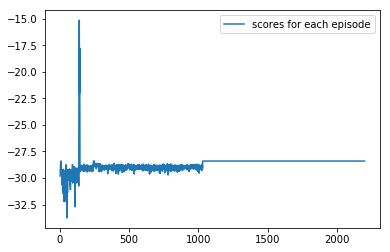

In [58]:
## First time through with everything working.
range(1, num_episodes+1)
plt.plot(end_scenario_rewards, label='scores for each episode')
plt.legend()
_ = plt.ylim()

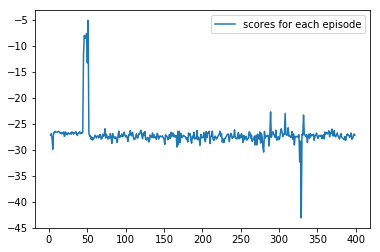

In [64]:
# Second time after adding duration (time staying alive) to reward function.  Hey...That's a little bit higher actually!
range(1, num_episodes+1)
plt.plot(end_scenario_rewards, label='scores for each episode')
plt.legend()
_ = plt.ylim()

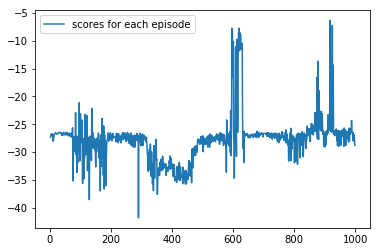

In [71]:
# Third time after adding dropout and lowering the learning rate.
#Took: CPU times: user 16min 51s, sys: 3min 55s, total: 20min 46s

range(1, num_episodes+1)
plt.plot(end_scenario_rewards, label='scores for each episode')
plt.legend()
_ = plt.ylim()

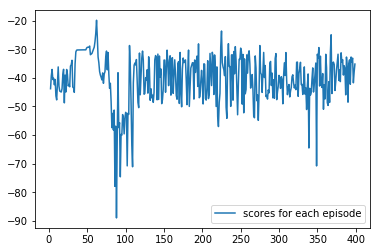

In [81]:
# Fourth time, super playing around with reward function (adding euler angles, etc)
#Took: CPU times: user 16min 51s, sys: 3min 55s, total: 20min 46s

range(1, num_episodes+1)
plt.plot(end_scenario_rewards, label='scores for each episode')
plt.legend()
_ = plt.ylim()

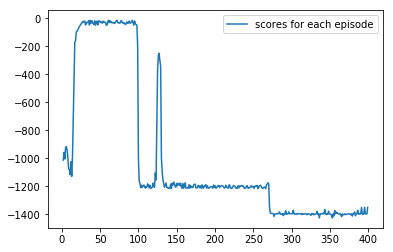

In [87]:
# fifth time-- added rotor speed standard deviation
#Took: CPU times: user 16min 51s, sys: 3min 55s, total: 20min 46s

range(1, num_episodes+1)
plt.plot(end_scenario_rewards, label='scores for each episode')
plt.legend()
_ = plt.ylim()

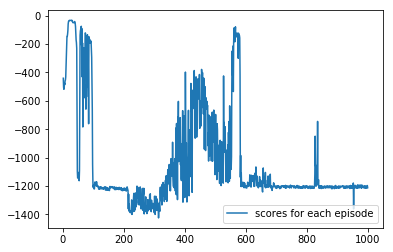

In [91]:
# sixth time-- more tweaks
#Took: CPU times: user 16min 51s, sys: 3min 55s, total: 20min 46s

range(1, num_episodes+1)
plt.plot(end_scenario_rewards, label='scores for each episode')
plt.legend()
_ = plt.ylim()

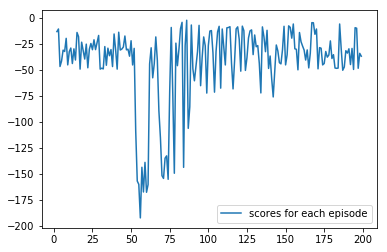

In [96]:
# seventh time-- Making rotor speed CONSISTENT

range(1, num_episodes+1)
plt.plot(end_scenario_rewards, label='scores for each episode')
plt.legend()
_ = plt.ylim()

### Info from a single episode using the agent

In [99]:
#%load_ext autoreload
#%autoreload 2

# Reuse agent previous defined from a training run. # agent = Basic_Agent(task)
done = False
results = {x : [] for x in labels}
state = agent.reset_episode() # start a new episode

while True:
    rotor_speeds = agent.act(state) 
    next_state, reward, done = task.step(rotor_speeds)
    agent.step(action, reward, next_state, done)

    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) \
                  + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])
    if done:
        break

print('All done with this episode, proceed to next cell for some plot fun.')


All done with this episode, proceed to next cell for some plot fun.


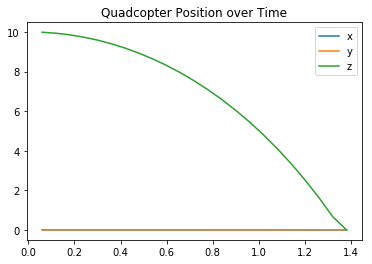

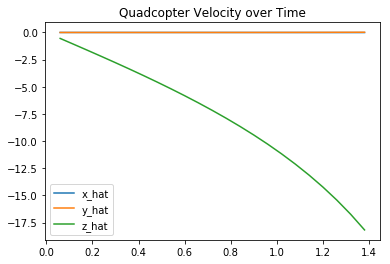

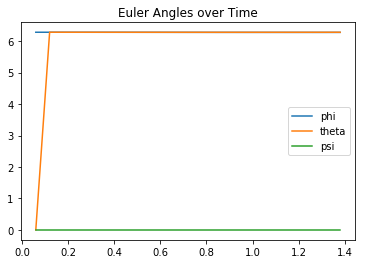

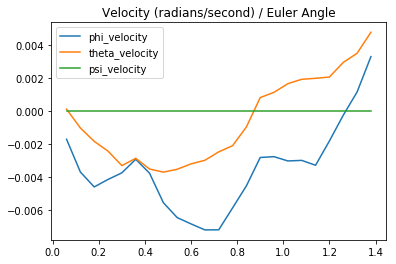

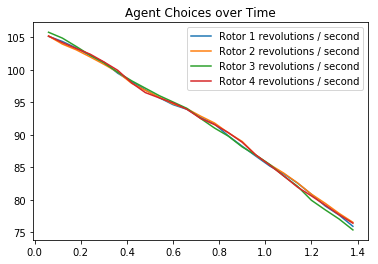

In [100]:
plt.title('Quadcopter Position over Time')
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
plt.ylim()
plt.show()

plt.title('Quadcopter Velocity over Time')
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
plt.ylim()
plt.show()

plt.title('Euler Angles over Time')
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
plt.ylim()
plt.show()

plt.title('Velocity (radians/second) / Euler Angle')
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
plt.ylim()
plt.show()

plt.title('Agent Choices over Time')
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
plt.ylim()
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:  I choose to pursue the 'hover task' first, and if I had success to move onto a 'hover and move' like task.

Initially I picked a height of 42, but since the initial target pose is 10, I decided to lower it to 18 so that the penalty is not so large.  Although maybe it makes sense to add it back now that I added other components to the reward function?

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used the same DDPG Actor-Critic network as covered in the other sections of the project's lectures. Gamma is set to a good rate in my opinion, I am under the impression most times it makes sense to start with .99 for Gamma, which means that exploitation will happen more than exploration. 

For the Actor-Critic network, because my computer was already slow to allocate the network up front, I didn't try to adjusting the layer sizes as I found them.  The actor is composed of a 32, then 64 then 32 dense layers, followed by a sigmoid activation function for the rotor speeds.  I got really annoyed that the model couldn't seem to learn to turn on all the rotors, so I reduced the output from 4 to 1 and repeated it so that the Actor would produce even rotor speeds.  This would preclude the helicopter from moving around, but helps tremendously with the hovering task.

The Critic layer has two components that are combined at the end.  One is for learning states and the other is for action-values, and they both have two dense layers of 32 and 64. 

For both of these networks, I added dropout for the first few layers. 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

This is a pretty hard task to learn, even when contraining rotor speeds to be consistent!
My quadcopter pretty much drops like a rock, open to suggestions at this point :(

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part to this project was indeed getting started.  I understand an earlier version of the project actually flew the helicopter in a ROS simulator and that would have been very splendid to have.  However, since I haven't been able to make ROS work at all on my laptop for the Self-Driving Nanodegree, I feel fortunate to not have to deal with it.  Once I figured out the plotting (as already provided), it wasn't too hard to interpret what was happening-- namely that my helicopter is dropping like a rock.
